In [1]:
import pandas as pd
import random
import seaborn as sns
from scipy.stats import ttest_ind
import math

testRollSet = pd.read_csv('FairOrUnfairDie.csv')
standardDieList = []
for _ in range (1000000):
   standardDieList.append(random.randint(1,6))

fairDieTestSet = pd.Series(standardDieList)

***QUESTION 1.	Find the descriptive statistics for each of the dice. (You can include them all in the same table) Include the mean, median, mode, and standard deviation. Paste your results here.***

In [2]:
testRollSet.describe()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2.733333,4.500000,3.433333,3.366667,3.500000,3.500000,3.866667,4.300000,3.733333,3.500000
std,1.595972,1.634752,1.524135,1.691425,1.570197,1.655711,1.634400,1.704962,1.659525,1.717054
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,2.000000,5.000000,3.000000,3.000000,3.500000,4.000000,4.000000,5.000000,4.000000,3.500000
75%,3.750000,6.000000,5.000000,5.000000,5.000000,4.750000,5.000000,6.000000,5.000000,5.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


***QUESTION 2.	Which of these dice do you think might be unfair? Choose at least one. Give a reason based on the values in the descriptive statistics for choosing the die or dice.*** 


**I will print boxplots of all the data to get a quick visualization to know which die to focus on with the described stats**

<Axes: >

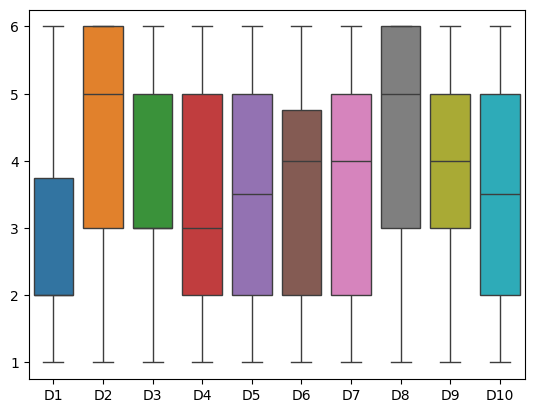

In [3]:

sns.boxplot(testRollSet)


**D2 has a mean of 4.5 and a median of 5, it is likely unfair**

***QUESTION 3.	Calculate the 95% confidence intervals for all the samples then paste the output below. Write the true mean (µ) for a 6-sided die below. If you do not remember, look back at the sampling distribution activity.***

**Null Hypothesis:  Each dice is fair with a mean of 3.5**

**Alternative Hypothesis: The dice is unfair and does not possess a mean of 3.5**

In [4]:
print("Comparing sample means to test roll mean (mu=3.5) at alpha = .05: \n")
outsideConfidence = []
withinConfidence = []
twoTailAlpha = 0.025
for columnName in testRollSet.columns:
    column = testRollSet[columnName]
    result = ttest_ind(column, fairDieTestSet)
    ub = round(column.mean() + result.confidence_interval(confidence_level=0.95).high,3)
    lb = round(column.mean() + result.confidence_interval(confidence_level=0.95).low,3)
    interval  = [lb, ub]
    print(columnName +" confidence interval: " + str(interval))
    if ub < 3.5 or lb > 3.5:
        outsideConfidence.append(columnName)
    else:
       withinConfidence.append(columnName)




Comparing sample means to test roll mean (mu=3.5) at alpha = .05: 

D1 confidence interval: [1.353, 2.576]
D2 confidence interval: [4.887, 6.109]
D3 confidence interval: [2.753, 3.976]
D4 confidence interval: [2.62, 3.842]
D5 confidence interval: [2.887, 4.109]
D6 confidence interval: [2.887, 4.109]
D7 confidence interval: [3.62, 4.842]
D8 confidence interval: [4.487, 5.709]
D9 confidence interval: [3.353, 4.576]
D10 confidence interval: [2.887, 4.109]


***4.	Examine each of the confidence intervals and decide if the true mean for a 6-sided die is in the interval. If the true mean is in the interval, what do you think this indicates? If the true mean is not in the interval, what do you think this indicates?***

In [5]:
print("\nDies where the null hypothesis mean falls inside the alpha=0.95 confidence interval: " + str(withinConfidence))

print("\nDies where the null hypothesis mean does not fall within the confidence interval: " + str(outsideConfidence))


Dies where the null hypothesis mean falls inside the alpha=0.95 confidence interval: ['D3', 'D4', 'D5', 'D6', 'D9', 'D10']

Dies where the null hypothesis mean does not fall within the confidence interval: ['D1', 'D2', 'D7', 'D8']


**My own words here and this is really complicated, so I could get this wrong: Confidence intervals mean that if the sample's procedure were repeated 100 times, 95 of the calculated confidence intervals for each sample would contain the true mean of the population (in this case the true mean of the die). This does not indicate a 95% chance that the true mean falls within the interval for a single sample. This is for judging the procedures that are producing the sample sets, not the population itself. In this case using an unfair die could be considered a prodecural failure (if we consider using a fair die to be the only valid procedure), so is useful here.**

**If for instance you wanted to know how many loaded die are in a bag, you would consider rolling any die a valid procedure regardless of their fairness, then these confidence intervals would be worthless.**

**Anyways, the dies where the interval does not contain the null hypothesis mean could indicate a problem with the die**
--------


***QUESTION 5.    Using α=0.05, have Minitab perform the hypothesis tests for the ones that you think might be unfair. Paste your results below.***

***QUESTION 6.	For each of the dice that you performed a hypothesis test for above, does the evidence suggest unfair or fair? Make sure to include the p-value and what it indicates for each die.***

**The code below answers both questions**

In [6]:

failToRejectNull = []
def makeDetermination(p: tuple, columnName: str):
    if p < 0.05:
        return " < 0.05, reject null: likely unfair"
    failToRejectNull.append(columnName)
    return " > 0.05, fail to reject null: can't be determined"



for columnName in testRollSet.columns:
    column = testRollSet[columnName]
    t,p = ttest_ind(column, fairDieTestSet)

    
    
    print(columnName + " level of significance: "+ str(round(p,3)) + makeDetermination(p, columnName))
    


D1 level of significance: 0.014 < 0.05, reject null: likely unfair
D2 level of significance: 0.001 < 0.05, reject null: likely unfair
D3 level of significance: 0.825 > 0.05, fail to reject null: can't be determined
D4 level of significance: 0.664 > 0.05, fail to reject null: can't be determined
D5 level of significance: 0.995 > 0.05, fail to reject null: can't be determined
D6 level of significance: 0.995 > 0.05, fail to reject null: can't be determined
D7 level of significance: 0.242 > 0.05, fail to reject null: can't be determined
D8 level of significance: 0.011 < 0.05, reject null: likely unfair
D9 level of significance: 0.458 > 0.05, fail to reject null: can't be determined
D10 level of significance: 0.995 > 0.05, fail to reject null: can't be determined


***7.    Now you will do a further analysis on the remaining dice that you did not include as unfair in question 6. You will be doing directional hypothesis tests (alternative > or alternative <). If the sample mean for a die is above the true mean µ, perform a right-tailed hypothesis test at the α=0.05 level of significance. If the sample mean for a die is below the true mean µ, perform a left-tailed hypothesis test at the α=0.05 level of significance. Paste your results below.***

In [7]:
print("@ alpha = .05 and 29 degrees of freedom: t=1.699")

for columnName in failToRejectNull:
    column = testRollSet[columnName]
    if column.mean()>3.5:
        t, p = ttest_ind(column, fairDieTestSet, alternative="greater")
        criticalValue = 1.699
        if t > criticalValue:
            print(columnName+ " mean is greater than mu, the t test : "+ str(round(t,3)) + " > " + str(criticalValue) + ". This means we reject the null.")
        else:
            print(columnName + " mean is greater than mu, the t test : "+ str(round(t,3)) + " < " + str(criticalValue) + ". This means we fail to reject the null.")

    elif column.mean()<3.5:
        t,p = ttest_ind(column, fairDieTestSet, alternative="less")
        criticalValue = -1.699
        if t < criticalValue:
            print(columnName + " mean is less than mu, the t test : "+ str(round(t,3)) + " < " + str(criticalValue) + ". This means we reject the null.")
        else:
            print(columnName + " mean is less than mu, the t test : "+ str(round(t,3)) + " > " + str(criticalValue) + ". This means we fail to reject the null.")
    else: 
        print(columnName + " mean is exactly mu, therefore fail to reject the null")

    

@ alpha = .05 and 29 degrees of freedom: t=1.699
D3 mean is less than mu, the t test : -0.221 > -1.699. This means we fail to reject the null.
D4 mean is less than mu, the t test : -0.434 > -1.699. This means we fail to reject the null.
D5 mean is exactly mu, therefore fail to reject the null
D6 mean is exactly mu, therefore fail to reject the null
D7 mean is greater than mu, the t test : 1.169 < 1.699. This means we fail to reject the null.
D9 mean is greater than mu, the t test : 0.741 < 1.699. This means we fail to reject the null.
D10 mean is exactly mu, therefore fail to reject the null


***8. Do your results from Minitab suggest that any of these dice are unfair? Make sure to include the
p-value for each die and make a statement about the die being fair or unfair based on the p-
value.***

**D1, D2, and D8 are likely unfair.**

**D1 mean has a p-value of 0.014, D2 mean has a p-value of 0.001 and D8 has a p-value of 0.010. All of which are below the alpha = 0.05**
